<a href="https://colab.research.google.com/github/KikoIsrael77/IBM-HR-Analytics-Employee-Attrition-Modeling/blob/main/Advertisment__assumptions_of_linear_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

When constructing a Linear Regression Model, it is important to consider several assumptions to ensure a better fit for the regression line. Linear Regression is a supervised machine learning algorithm that utilizes one or more independent variables to explain the dependent (predictor) variable. Here are the six assumptions of linear regression:

**Linearity:** The relationship between the independent variables and the dependent variable is assumed to be linear.

**Multicollinearity:** The independent variables should not have high correlation with each other, as it can lead to issues of multicollinearity.

**Mean of Residuals**: The mean of the residuals (the differences between the actual and predicted values) should ideally be close to zero.

**Normality of Residuals:** The error terms (residuals) are assumed to be normally distributed.

**Independence of Error Terms**: The error terms should be independent of each other, meaning that the error in one observation should not depend on the errors of other observations.

**Homoscedasticity/Heteroscedasticity:** Homoscedasticity refers to the assumption that the variance of the error terms is constant across all levels of the independent variables. Heteroscedasticity, on the other hand, occurs when the variance of the error terms is not constant across different levels of the independent variables.

By keeping these assumptions in mind, we can build a more reliable and accurate Linear Regression Model.


In [51]:
import pandas as pd  # Importing the pandas library for data manipulation and analysis
import numpy as np  # Importing the numpy library for numerical computations
import matplotlib.pyplot as plt  # Importing the matplotlib library for data visualization
import seaborn as sns  # Importing the seaborn library for advanced data visualization

from sklearn.preprocessing import StandardScaler  # Importing the StandardScaler class for feature scaling
from sklearn.linear_model import LinearRegression  # Importing the LinearRegression class for linear regression modeling
from sklearn.metrics import mean_absolute_error, r2_score  # Importing the mean_absolute_error and r2_score functions for evaluation purposes


In [52]:
df = pd.read_csv(r"Advert.csv").set_index("Unnamed: 0")  # Reading the CSV file "Advert.csv" into a pandas DataFrame and setting the "Unnamed: 0" column as the index
df.head()  # Displaying the first few rows of the DataFrame


,TV,Radio,Newspaper,Sales
Unnamed: 0,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [53]:
df.shape  # Displaying the shape of the DataFrame

(200, 4)

In [54]:
df.describe()  # Generating descriptive statistics of the DataFrame

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [55]:
df.info()  # Displaying concise summary information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [56]:
def two_plots_num_column(feature):
    # prints the skewness value of the specified column to 2 decimal places
    print(f"the skewness value of {feature} column = {df[feature].skew():.2f}")
    
    # sets the figure size to 10x4 inches
    plt.figure(figsize=(10,4))
    
    # creates a subplot with 1 row, 2 columns, and selects the first subplot
    plt.subplot(1,2,1)
    
    # sets the title of the first subplot to "Piechart"
    plt.title('Piechart')
    
    # creates a histogram of the specified column with a density curve
    sns.histplot(data=df, x=feature, kde=True)
    
    # adds vertical lines for the mean and median of the column, with colors red and green, respectively
    plt.axvline(x = df[feature].mean(), c = 'red')
    plt.axvline(x = df[feature].median(), c = 'green')

    # creates a second subplot and selects it
    plt.subplot(1,2,2)
    
    # sets the title of the second subplot to "Boxplot"
    plt.title('Boxplot')
    
    # creates a box plot of the specified column
    sns.boxplot(y=df[feature])
    
    # displays the figure
    plt.show()


the skewness value of TV column = -0.07


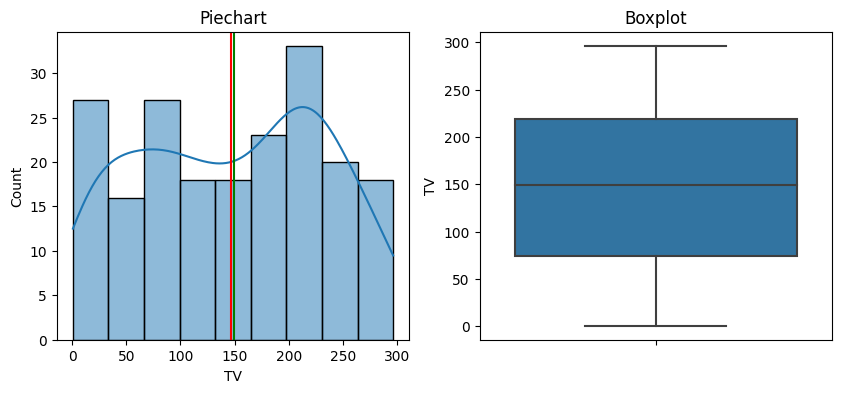

In [57]:
# Pie chart Plot (PIECHART and BOX PLOT) Having skewness value of 0.07
two_plots_num_column('TV')

the skewness value of Radio column = 0.09


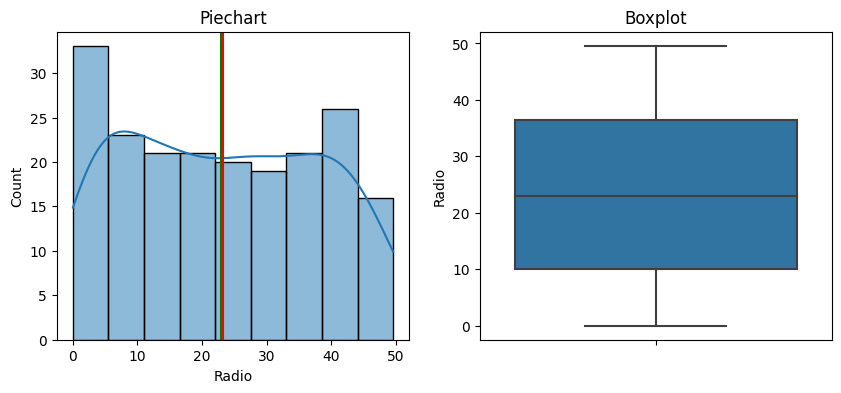

In [58]:
# Pie chart Plot (PIECHART and BOX PLOT) Having skewness value of 0.09
two_plots_num_column('Radio')

the skewness value of Newspaper column = 0.89


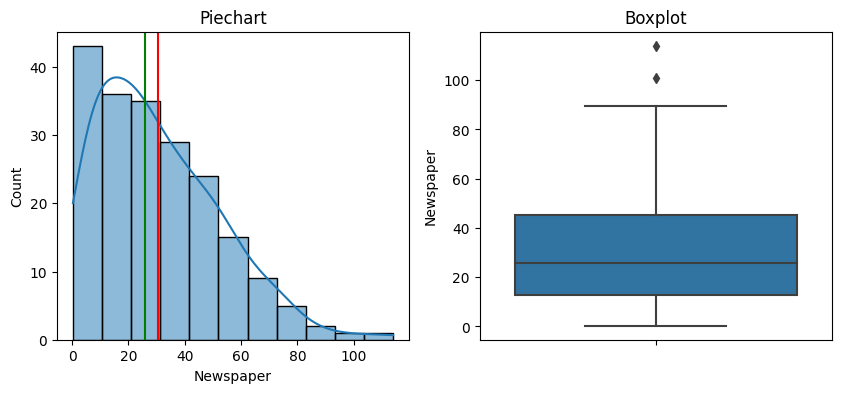

In [59]:
# Pie chart Plot (PIECHART and BOX PLOT) Having skewness value of 0.09
two_plots_num_column('Newspaper')

In [60]:
# Assuming that df is a Pandas DataFrame and it has a column named 'Newspaper'
# This line unpacks the values of the 'Newspaper' column into two variables q1 and q2
#q1, q2 = df['Newspaper']  

# This line calculates the 25th and 75th percentile values of the 'Newspaper' column and assigns them to q1 and q3, respectively.
q1, q2 = df['Newspaper'].quantile([0.25, 0.75]) 

# This line calculates the interquartile range (IQR) of the 'Newspaper' column.
iqr = q2 - q1 

# This line calculates the lower and upper bounds of the 'Newspaper' column based on the IQR.
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q2 + (1.5 * iqr) 

# This line replaces any values in the 'Newspaper' column that are outside of the lower and upper bounds with NaN.
df.loc[(df["Newspaper"] < lower_bound) | (df["Newspaper"] > upper_bound), "Newspaper"] = np.nan 

# This line replaces any NaN values in the 'Newspaper' column with the mean of the column.
df["Newspaper"].fillna(df["Newspaper"].mean(), inplace=True)


the skewness value of Newspaper column = 0.65


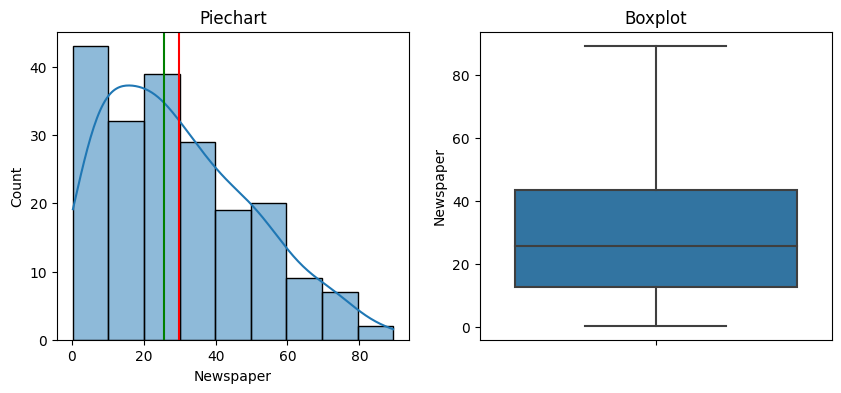

In [61]:
two_plots_num_column("Newspaper")
#Skewness change
#FROM the skewness value of Newspaper column = 0.89
#TO the skewness value of Newspaper column = 0.65

the skewness value of Sales column = 0.41


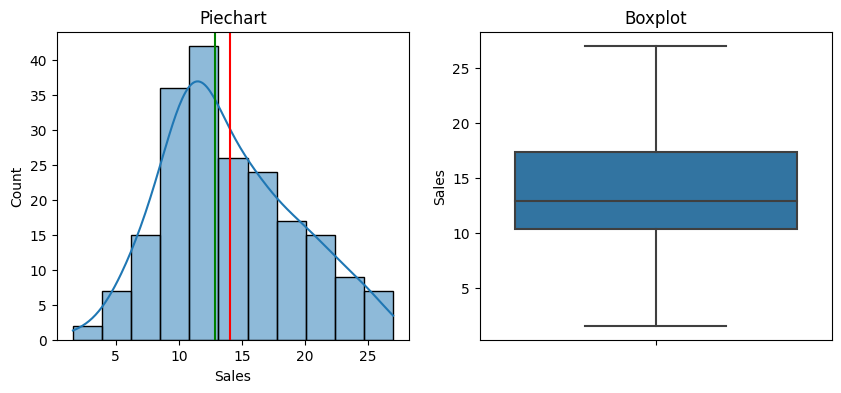

In [62]:
two_plots_num_column('Sales')

**LINEARITY**

The correlation between X and the mean of Y is considered linear. If the relationship is not linear, we can use polynomial regression or machine learning algorithms to model it. For linear regression to be effective, the independent and dependent variables must be linearly correlated. To check the relationship between the independent variables and the Sales variable, we can use a pair plot. Attempting to fit a straight line to independent and dependent variables that are not linearly correlated will result in lower model accuracy.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


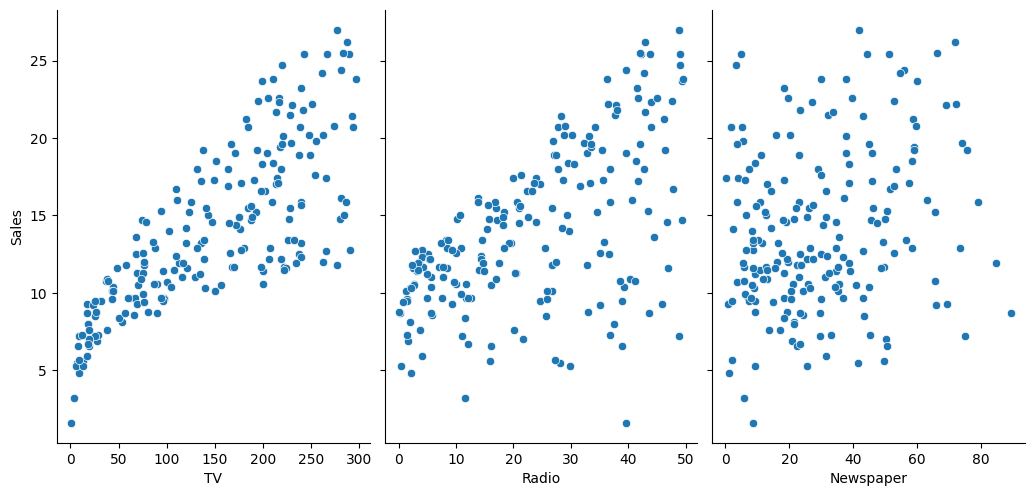

In [63]:
# Create a pair plot using Seaborn to visualize the relationship between the independent variables and the Sales variable in a DataFrame.
sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=5, aspect=0.7);


Based on the pair plots, we can observe, and obvious that the TV feature has a linear relationship with the Sales variable. However, the Radio feature doesn't seem to have a completely linear relationship with Sales, but it still appears to be more linear than the Newspaper feature, which seems to have a very weak relationship with Sales. Hence, it can be concluded that a linear regression model may not be the best fit for the data with respect to Newspaper, whereas it could work well with the TV and Radio features.

As a (data) analyst, it is important to address the issue of multicollinearity. This refers to the presence of correlation among independent variables. To assess this, one can create a pairwise correlation plot and avoid including variables that display high levels of correlation. This practice helps ensure the integrity and reliability of the analysis.**bold text**

<Figure size 1000x1000 with 0 Axes>

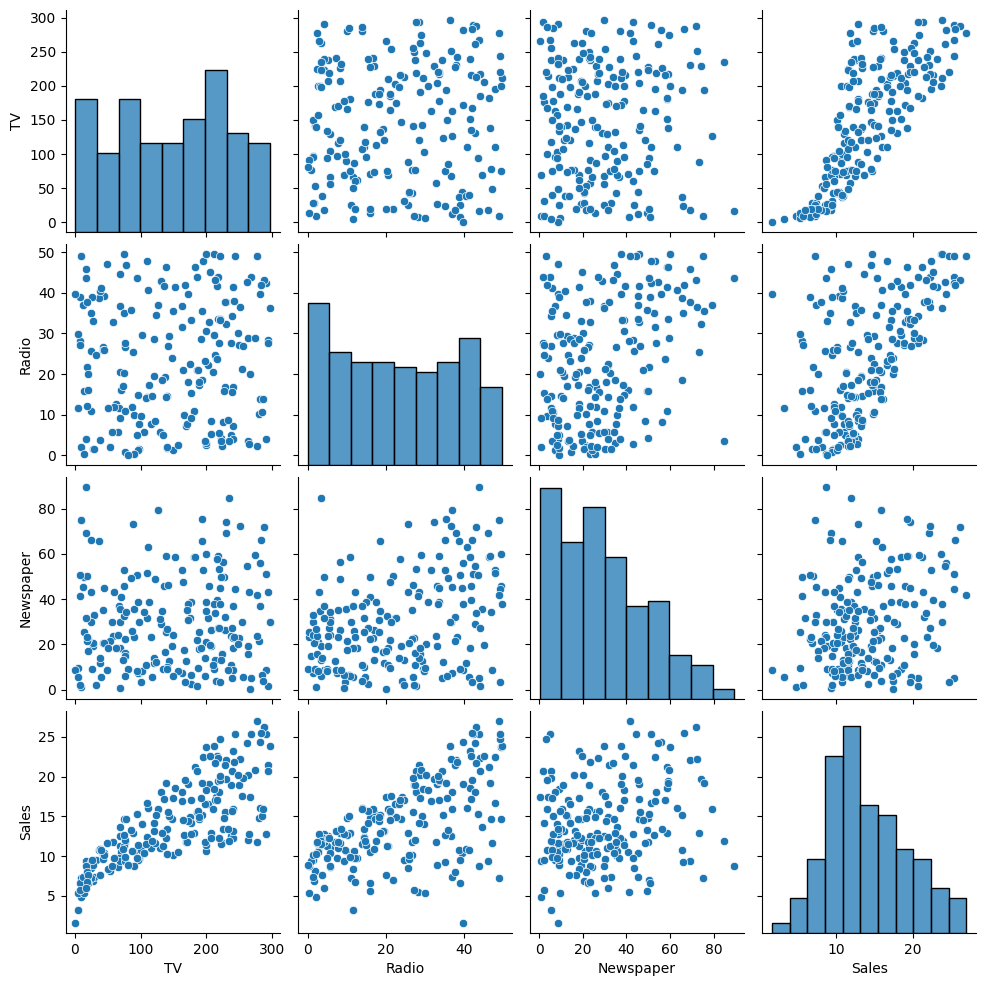

In [64]:
# Plotting pairwise relationships between variables
# Creating a figure with a size of 10x10
plt.figure(figsize=(10,10))

# Generating a pairplot to visualize pairwise relationships in the DataFrame
sns.pairplot(df)

# Displaying the plot
plt.show()

 It is important to be aware that sometimes there can be hidden correlations between independent variables and a dependent variable that are not easily identified through a correlation plot. In such cases, it is helpful to examine the VIF (Variance Inflation Factor).

The VIF is a metric that ranges from 1 to infinity. A VIF value of 1 indicates no multicollinearity, while higher VIF values indicate increasing levels of multicollinearity. Specifically:

VIF between 1 and 5 suggests moderate multicollinearity.
VIF between 5 and 10 suggests a higher level of multicollinearity.
VIF above 10 indicates a very high level of multicollinearity.
By considering the VIF values of the variables, a data analyst can gain insights into the extent of multicollinearity present in the data and make informed decisions regarding variable selection and model building.

Note;
What VIF is acceptable?
The generally accepted cut-off for VIF is 2.5, with higher values denoting levels of multicollinearity that could negatively impact the regression model.







In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Extracting the columns for VIF calculation, excluding the 'Sales' column
columns = df.drop(columns='Sales').columns

# Creating an empty DataFrame for VIF data
vif_data = pd.DataFrame()
vif_data["feature"] = columns

# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df.drop(columns='Sales').values, i)
                   for i in range(len(columns))]

# Displaying the VIF data
vif_data


,feature,VIF
0,TV,2.511802
1,Radio,3.299805
2,Newspaper,3.137342


Buttressing the note in the VIF acceptance and it cut-off, we notice the mimimum cut-off for TV is (2.511802) which is inline with VIF ACCEPTABILITY, while having other higher values denoting  levels of multicollinearity, which might negatively impart the regression models.

Denoting that all VIF's are less than 5



When building the model, it's important to consider the following assumptions:

Linearity: Ensure that the relationship between the independent variables and the dependent variable is approximately linear.

Independence: The observations should be independent of each other. Avoid using data with autocorrelation or time-series dependencies.

Homoscedasticity: The variance of the residuals should be constant across all levels of the independent variables. You can check this assumption by examining the residual plot.

Normality of residuals: The residuals should follow a normal distribution. You can assess this assumption by checking a histogram or using statistical tests like the Shapiro-Wilk test.

No multicollinearity: We have already addressed this assumption through the VIF analysis. Ensure that the variables are not highly correlated with each other.

Once you have built the model, you can evaluate the assumptions by analyzing the residuals and conducting relevant statistical tests. If any assumptions are violated, you may need to make adjustments to the model or explore alternative modeling techniques.

Remember to validate your model using appropriate techniques such as cross-validation or holdout testing to assess its predictive performance on unseen data.

Great! all the features have VIF values below 5, indicating a low level of multicollinearity. With this information, we can proceed to build a regression model and assess other assumptions.

No we can build the Model for other Assumption

In [66]:
# Separating the independent variable(s) from the DataFrame
X = df.drop(["Sales"], axis=1)

# Extracting the dependent variable
y = df["Sales"]


In [67]:
# Training the data Set
# Splitting the data into training and test sets
from sklearn.model_selection import train_test_split

# Splitting the independent and dependent variables into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)


In [68]:


# Creating an instance of the linear regression model
model = LinearRegression()

# Fitting the model to the training data
model.fit(X_train, y_train)

# Predicting the target variable using the trained model on the training data
y_pred = model.predict(X_train)


In [69]:
# Printing R-squared and Mean Absolute Error (MAE) metrics
from sklearn.metrics import r2_score, mean_absolute_error

# Calculating and printing the R-squared score
r2 = r2_score(y_true=y_train, y_pred=y_pred)
print("R-squared: {}".format(r2))

# Calculating and printing the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_train, y_pred)
print("MAE: {}".format(mae))

#What is MAE? 


R-squared: 0.8966082409611836
MAE: 1.2157059252779598


What is MAE?

Mean Absolute Error (MAE) is a metric used to measure the average absolute difference between the true values and the predicted values. It provides a measure of the average magnitude of errors made by a model, regardless of the direction of the errors.

MAE is particularly useful when dealing with outliers or when the magnitude of errors is important to consider. It is easy to interpret, as it represents the average absolute deviation from the true values.

MEAN RESIDUAL
In statistical analysis, the mean of residuals is expected to be zero.

In [70]:
# Creating a list of residuals
residuals = y_train.values - y_pred

# Calculating the mean of residuals
mean_residuals = np.mean(residuals)
print("Mean of Residuals: {}".format(mean_residuals))


Mean of Residuals: -2.486899575160351e-16


The mean of residuals is nearly zero, indicating excellent performance

Normalites of Residuals

The assumption is made that the error term follows a normal distribution.

<Figure size 640x480 with 0 Axes>

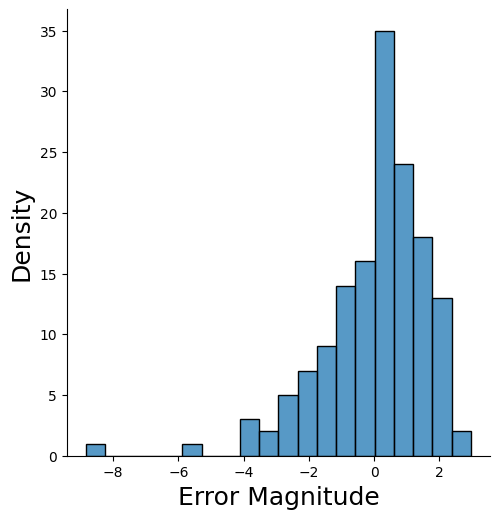

In [71]:
# Plotting the histogram of the error terms
fig = plt.figure()  # Creating a figure object to hold the plot

sns.displot(residuals, bins=20)  
# Plotting the histogram of the error terms using seaborn's distplot function( if it's distplot there will be an error because of version control)


fig.suptitle('Distribution of Error Terms', fontsize=20)  # Adding a title to the figure

plt.xlabel('Error Magnitude', fontsize=18)  # Adding a label to the x-axis

plt.ylabel('Density', fontsize=18)  # Adding a label to the y-axis

plt.show()  # Displaying the plot


The distribution of the error terms appears to be slightly positively skewed.

The **independence of error terms** implies that they should not exhibit any systematic relationship or pattern with each other. In other words, the error terms should be randomly distributed without any discernible pattern, as shown in the diagram below.

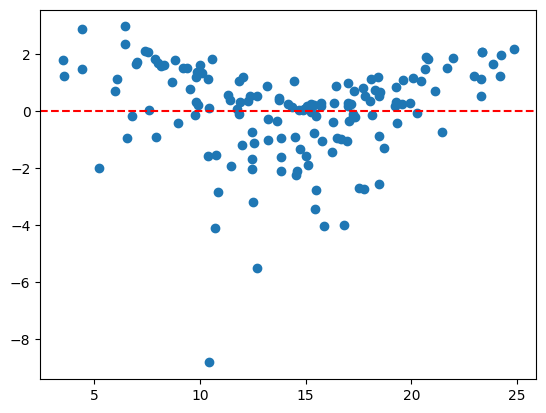

In [72]:
plt.scatter(y_pred, residuals)  # Plotting the residuals against the predicted values

plt.axhline(y=0, color="red", linestyle="--")  # Adding a horizontal line at y=0 as a reference for zero error 
#Linestyle = "--", will explain the project better
#For other line style;https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html

plt.show()  # Displaying the scatter plot


**Heteroscedasticity** refers to a situation where the variability of the residuals in a regression model is not constant across different levels of the predictor variables. In other words, the variance of the residuals changes as the error term increases or decreases, and it may exhibit a discernible pattern.

To identify **heteroscedasticity**, we can employ a statistical test known as the *Breusch-Pagan* test. This test examines whether **heteroscedasticity** exists in the residuals of the regression model.

The null hypothesis of the *Breusch-Pagan* test assumes that the variance of the residuals is constant, indicating **homoscedasticity**. On the other hand, the alternative hypothesis suggests that the variance of the residuals is not constant, indicating **heteroscedasticity.**

By conducting the *Breusch-Pagan* test and analyzing the resulting p-value, we can determine whether there is evidence to support the presence of **heteroscedasticity** in the regression model. Rejecting the null hypothesis implies the existence of heteroscedasticity, while failing to reject the null hypothesis suggests the absence of significant **heteroscedasticity.**








In [73]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

# Specify the names of the test statistics
name = ['f_statistic', 'p_value', 'lagrange multiplier stat']

# Perform the Breusch-Pagan test
test = sms.het_breuschpagan(residuals, X_train)

# Combine the names and test statistics using lzip
result = lzip(name, test)

# Print the results
for stat, value in result:
    print("{}: {}".format(stat, value))


f_statistic: 15.759787953447212
p_value: 0.00037827316041646824
lagrange multiplier stat: 5.7525952763775


In [74]:
# Calculating and printing R-squared and Mean Absolute Error (MAE) metrics
from sklearn.metrics import r2_score, mean_absolute_error

# Calculating the R-squared score
r2 = r2_score(y_true=y_train, y_pred=y_pred)
print("R-squared: {}".format(r2))

# Calculating the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_train, y_pred)
print("MAE: {}".format(mae))


R-squared: 0.8966082409611836
MAE: 1.2157059252779598


Excellent!:: The model appear:s to be well-fitted based on the results.

I hope you found this notebook enjoyable, and I would greatly appreciate any suggestions you may have.

In future iterations of the notebook, I will continue to experiment and improve the model further.

If you found this notebook helpful and informative, please consider upvoting it. Thank you! 👍